# Teresia Kariuki
# Phase 3 Project.
## 1. BUSINESS UNDERSTANDING.
# SyriaTel Customer Churn Prediction

In this project, the aim is to build a binary classifier that predicts whether a customer is likely to stop doing business with SyriaTel, a prominent telecommunications company. Customer churn is a critical issue for telecom companies as it directly impacts revenue and growth. By analyzing historical customer data, the goal is to identify patterns that indicate when a customer is likely to churn.




## 2. LOADING AND UNDERSTANDING THE DATA.

In [1]:
# importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# unzipping the file

import zipfile

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("syria_churn_data")


In [31]:
df = pd.read_csv("syria_churn_data/telechurn.csv")  
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 3. DATA PREPARATION

In [32]:
# Data inspection

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [35]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [36]:
df.drop(columns=['state', 'area code', 'phone number'], inplace=True) # Drop columns we won't need.


In [37]:
# converting categorical columns to numeric
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({True: 1, False: 0})


In [39]:
df.drop_duplicates(inplace=True) # dropping duplicates


In [40]:
print(df.shape)
print(df.columns)


(3333, 18)
Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')


## 4.Modeling

### Manual Oversampling

In [47]:
# Step 1: Separate churners and non-churners
churners = df[df['churn'] == 1]
non_churners = df[df['churn'] == 0]

# Step 2: Oversample churners to match non-churners
churners_oversampled = churners.sample(n=len(non_churners), replace=True, random_state=42)

# Step 3: Combine into a new balanced dataset
df_balanced = pd.concat([non_churners, churners_oversampled])

# Step 4: Shuffle the data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Confirm new class balance
print(df_balanced['churn'].value_counts())


churn
0    2850
1    2850
Name: count, dtype: int64


Our data set is now balanced.

###  Splitting the Data (Train/Test)

In [49]:
from sklearn.model_selection import train_test_split

# Drop the target column to get features
X = df.drop('churn', axis=1)
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8590704647676162
Confusion Matrix:
 [[549  21]
 [ 73  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
model = LogisticRegression(class_weight='balanced', max_iter=5000)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=5000)

In [66]:
y_pred = model.predict(X_test_scaled)


### Interpratation.

**Overall accuracy**  The model correctly predicted whether a customer would churn or not 85.9% of the time. This is a solid score, meaning it’s right about 86 times out of 100. However, accuracy alone doesn’t tell the full story, especially because we care more about correctly predicting churners (those who will leave).

**Confusion Matrix** 

True Negatives (549) - The model correctly identified loyal customers who didn't churn.

False Positives (21) - The model predicted churn for these customers, but they didn’t actually churn.

False Negatives (73)-These are the customers that the model predicted loyal, but they actually churned — **this is a big issue because we missed potential churners.**

True Positives (24)- The model correctly identified customers who churned.

**Precision & Recall**

For non **churners.**

Precision: 88% — When the model predicts "no churn," it’s right 88% of the time.

Recall: 96% — The model is catching 96% of all actual loyal customers.

For **churners** (Class 1):

Precision: 53% — When the model predicts "churn," it’s correct 53% of the time.

Recall: 25% — The model only catches 25% of the customers who actually churn.




### ROC AND AUC

AUC Score: 0.8152


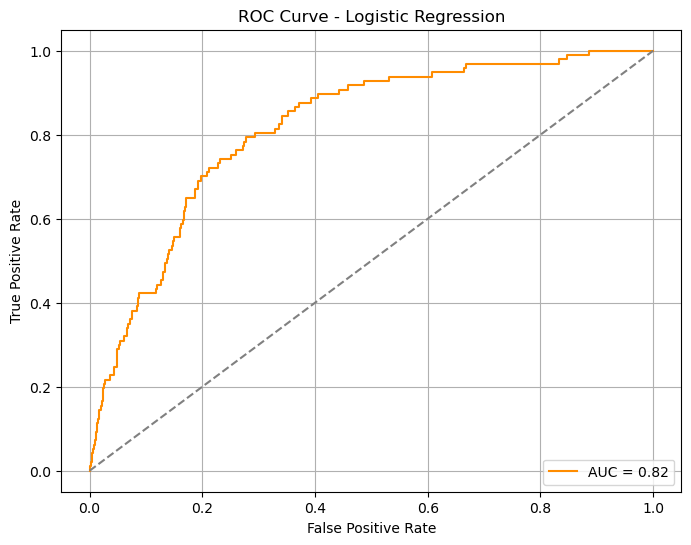

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities (not labels)
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Interpretation

**AUC Score**
The AUC score of 0.8152 means that the logistic regression model is pretty good at distinguishing between customers who will churn and those who won’t.

0.5 = Random guessing.

0.7–0.8 = Acceptable.

0.8–0.9 = Good.

greater than 0.9 = Excellent

With an AUC of 0.8152, our model falls into the "good" range. This is a solid outcome. So, the model is doing a good job at predicting churn and no churn!

### Understanding which features most influence churn

In [68]:
# Combine feature names with their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of coefficient
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Drop the helper column and display
feature_importance.drop(columns='Abs_Coefficient', inplace=True)
print(feature_importance)


                   Feature  Coefficient
2          voice mail plan    -0.935186
16  customer service calls     0.816473
1       international plan     0.694260
3    number vmail messages     0.586582
4        total day minutes     0.335743
6         total day charge     0.331009
7        total eve minutes     0.175170
14        total intl calls    -0.174207
9         total eve charge     0.171814
15       total intl charge     0.151170
8          total eve calls     0.076813
0           account length     0.074531
12      total night charge     0.059525
10     total night minutes     0.057329
5          total day calls     0.051611
13      total intl minutes     0.045022
11       total night calls     0.001592


### Interpretation

**To note**

Positive coefficient → feature increases the likelihood of churn.

Negative coefficient → feature decreases the likelihood of churn.

Larger absolute value → greater influence on the model’s prediction.

**Top Influential Features.**
1. Voice Mail Plan (-0.94)
Negative impact: Having a voice mail plan lowers the chance of churn.

Interpretation: Customers with a voice mail plan tend to be more satisfied or engaged.

2. Customer Service Calls (+0.82)
Positive impact: More customer service calls increase the chance of churn.

Interpretation: If customers call support often, they may be frustrated and likely to leave.

3. International Plan (+0.69)
Positive impact: Having an international plan is linked to a higher chance of churn.

Interpretation: Maybe international users are less loyal or face issues.

4. Number of Voicemail Messages (+0.59)
this might indicate active users

6. Total Day Minutes / Charges (+0.33)
Heavy daytime usage correlates slightly with higher churn, possibly from cost-conscious or business users.

**Conclusion**
The model found that customers who made many customer service calls, had international plans, and had high voicemail activity were more likely to churn. On the other hand, having a voice mail plan reduced the risk of churn — suggesting it could be a useful customer retention tool.



### Visualization of the above.

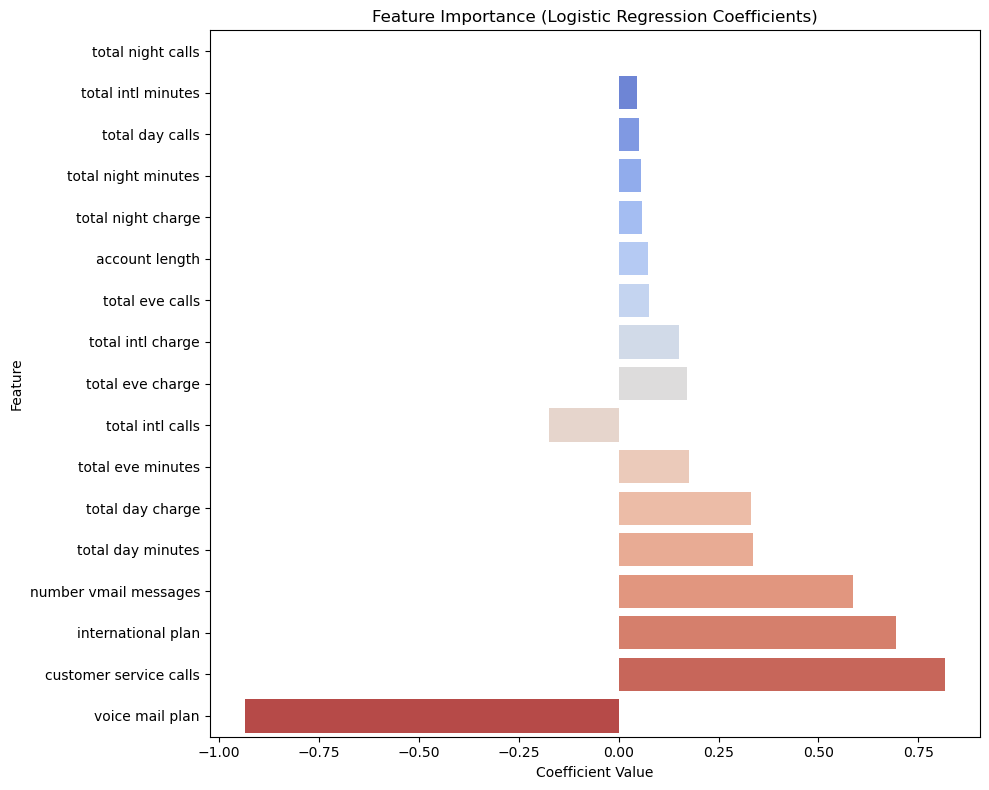

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you already have the coefficients and feature names stored as a DataFrame
coeff_df = pd.DataFrame({
    'Feature': ['voice mail plan', 'customer service calls', 'international plan', 'number vmail messages',
                'total day minutes', 'total day charge', 'total eve minutes', 'total intl calls',
                'total eve charge', 'total intl charge', 'total eve calls', 'account length',
                'total night charge', 'total night minutes', 'total day calls',
                'total intl minutes', 'total night calls'],
    'Coefficient': [-0.935186, 0.816473, 0.694260, 0.586582, 0.335743, 0.331009, 0.175170,
                    -0.174207, 0.171814, 0.151170, 0.076813, 0.074531, 0.059525, 0.057329,
                    0.051611, 0.045022, 0.001592]
})

# Sort by absolute coefficient value
coeff_df['abs_coef'] = coeff_df['Coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='abs_coef', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df_sorted, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Decision Tree

Decision Tree Accuracy: 0.9055472263868066
Confusion Matrix:
 [[543  27]
 [ 36  61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.69      0.63      0.66        97

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667



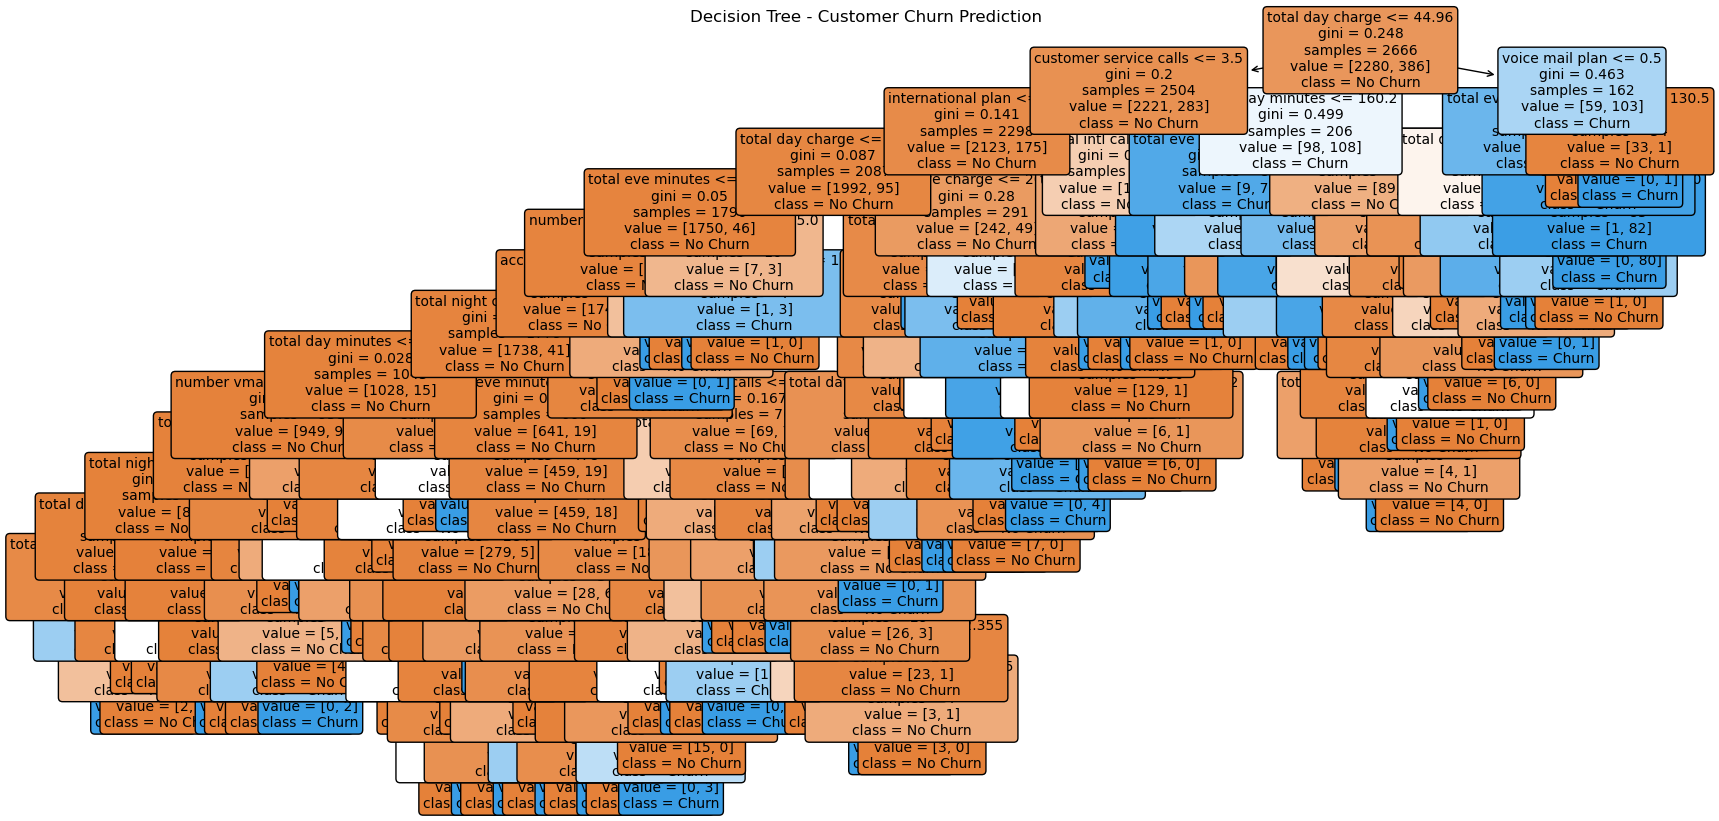

In [71]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Visualize the decision tree (optional)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Churn', 'Churn'], 
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree - Customer Churn Prediction")
plt.show()


### Interpretation

**Model Performance**
Accuracy - 90.6%
The model correctly predicted whether a customer would churn or not in about 9 out of 10 cases. This is a significant improvement compared to the logistic regression model, which had an accuracy of around 85.9%.

**Confusion Matrix**

True Negatives (543) - Correctly predicted customers who didn’t churn.

True Positives (61) - Correctly predicted customers who churned.

False Positives (27) - Predicted churn, but they didn’t actually churn.

False Negatives (36) - Predicted non-churn, but they actually churned.

This model is catching more churners than the previous one. This is critical for businesses to prevent customer loss.

**Classification Report**
Precision (churn class = 0.69) - Out of all the customers predicted to churn, 69% actually did. This is a solid improvement, indicating the model is better at correctly identifying churners.

Recall (churn class = 0.63) - The model detected 63% of all actual churners, which is a big improvement from the previous 25% (in the logistic regression model). This means the model is now catching more of the customers who are likely to leave.

F1-score (churn class = 0.66) - This is a balanced score combining precision and recall. It reflects that the model is now performing better overall in predicting churn, with a good balance between correctly identifying churners and minimizing false positives.

**Summary**
The model has significantly improved in predicting churn, with higher accuracy, precision, recall, and F1-score compared to the logistic regression model. Specifically, it’s now better at detecting actual churners (with a 63% recall), which is a big win for customer retention efforts.



### Model Comparison and Conclusion

In this project, we compared two models to predict customer churn for SyriaTel. Logistic Regression and the Decision Tree Classifier. Both models were trained on a balanced dataset after preprocessing, and their performance was evaluated based on accuracy, precision, recall, and F1-score, with a focus on detecting customers likely to churn.

**Logistic Regression**

Accuracy: 85.9%
The model predicted churn correctly 86% of the time.

Precision (Churn): 0.53
Out of all the customers predicted to churn, only 53% actually churned.

Recall (Churn): 0.25
It only detected 25% of the actual churners, which is low and means many churners weren’t flagged.

F1-score (Churn): 0.34
This score combines precision and recall, and shows the model’s performance in identifying churners was weak.

Conclusion -  While Logistic Regression had good overall accuracy, its low recall for churners means it missed a lot of customers who actually churned. This would be problematic for a business trying to retain customers, as many at-risk customers wouldn’t be flagged for intervention.

**Decision Tree Classifier**

Accuracy: 90.6%
The model correctly predicted churn in 91% of cases, a clear improvement over Logistic Regression.

Precision (Churn): 0.69
When the model predicted churn, 69% of the time it was correct.

Recall (Churn): 0.63
The model caught 63% of all actual churners, a big improvement over Logistic Regression’s 25%.

F1-score (Churn): 0.66
The Decision Tree’s F1-score is much better, showing a good balance between precision and recall.

Conclusion - The Decision Tree model performed significantly better, especially in identifying churners. It correctly flagged 63% of customers who were likely to churn, which is a much more effective result for reducing churn.

**Final Recommendation**

Given the goal of this project is to predict and reduce customer churn , the Decision Tree Classifier is the preferred model. It has much better recall and F1-score for churn, making it a better choice for SyriaTel to take timely actions and retain valuable customers.



## VISUALIZATIONS

### Customer Churn Visualization.

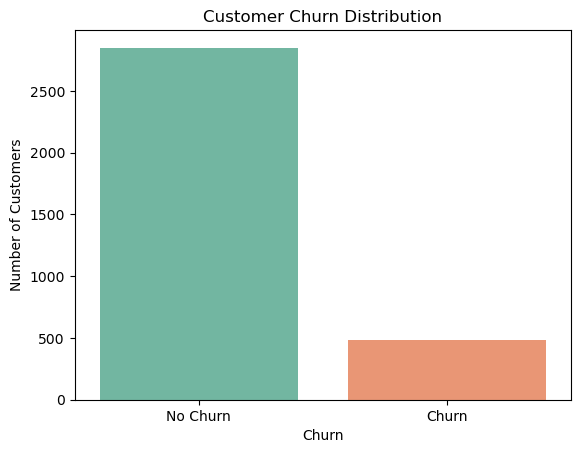

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()


### Interpretation.
No Churn (left bar) - A very large number of customers did not churn — around 2,800+.

Churn (right bar) - A much smaller number of customers actually churned — around 500+

### Decision tree confusion matrix

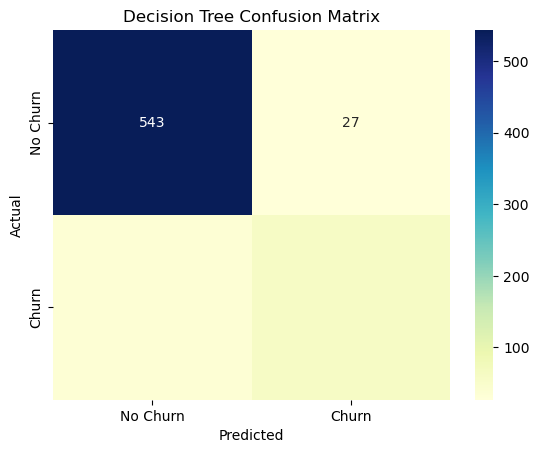

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


### Interpretation
True Negatives (543) - Correctly predicted customers who didn’t churn.

True Positives (61) - Correctly predicted customers who churned.

False Positives (27) - Predicted churn, but they didn’t actually churn.

False Negatives (36) - Predicted non-churn, but they actually churned.

### Top 10 Features Influencing Churn Decision Tree

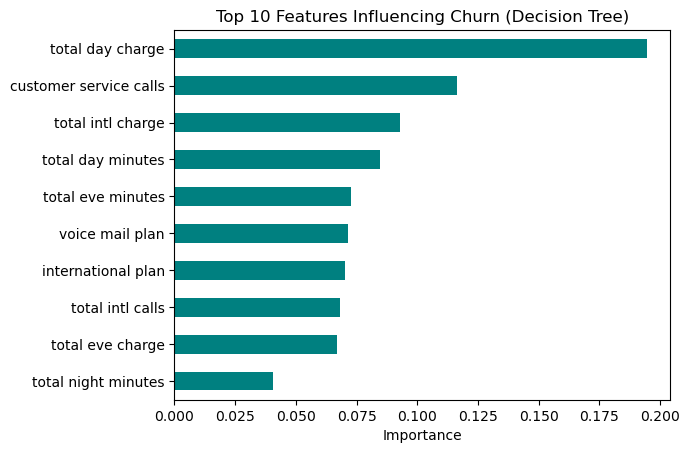

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Fit the model again (if needed)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict (optional if already done)
y_pred_dt = dt_classifier.predict(X_test)

# Plot feature importance
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(dt_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.xlabel('Importance')
plt.title('Top 10 Features Influencing Churn (Decision Tree)')
plt.gca().invert_yaxis()
plt.show()


### Logistic Regression vs Decision Tree performance

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [83]:
# Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)


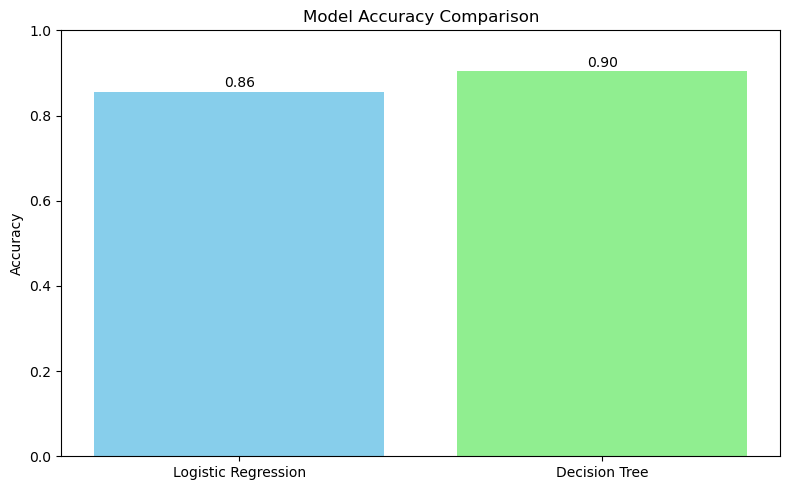

In [84]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Accuracy
logreg_acc = accuracy_score(y_test, y_pred_logreg)
dt_acc = accuracy_score(y_test, y_pred_dt)

# Plot
models = ['Logistic Regression', 'Decision Tree']
accuracies = [logreg_acc, dt_acc]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center')

plt.tight_layout()
plt.show()


### Interpretation
Decision tree has a higher accuracy of 0.9 as compared to logistic regression .

### Feature Importance (Decision Tree)

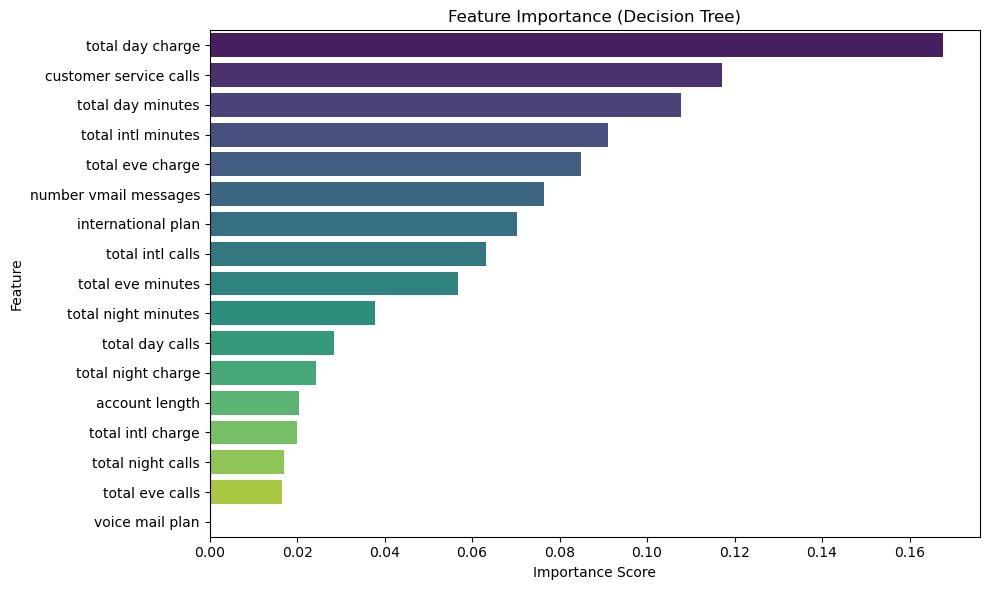

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
importances = dt_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Feature Correlation with Churn

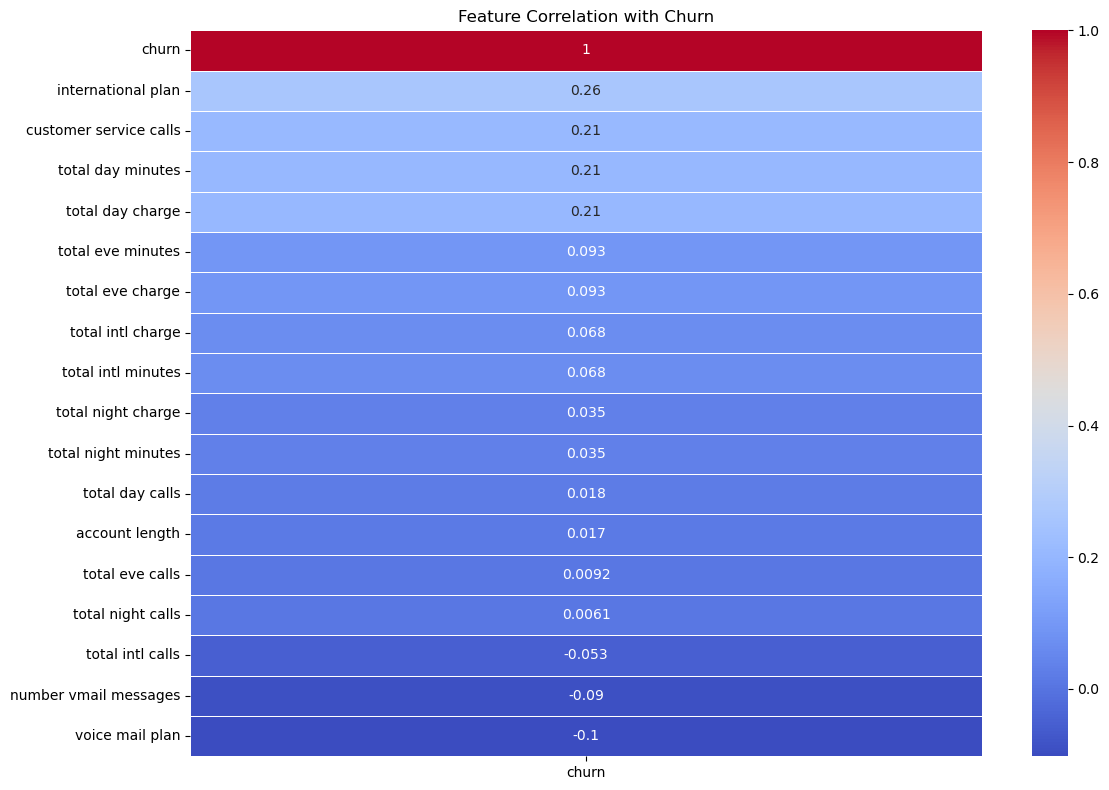

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your data is in a DataFrame called df_final
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)

# Focus on how features relate to churn
sns.heatmap(correlation[['churn']].sort_values(by='churn', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Feature Correlation with Churn')
plt.tight_layout()
plt.show()
